------------------------------ 
# 任务：

抓取电影《好东西》最新豆瓣短评相关数据。
- url:
https://movie.douban.com/subject/36154853/comments?sort=time&status=P

------------------------------ 

# 第一部分：利用Selenium获取cookie信息

In [17]:
from selenium import webdriver

# 启动浏览器并登录
driver = webdriver.Firefox()
driver.get("https://www.douban.com")

# 等待网页加载并模拟登录

In [ ]:
# 在登录后获取所有 Cookie
cookies = driver.get_cookies()
cookies

[{'name': 'll',
  'value': '"118282"',
  'path': '/',
  'domain': '.douban.com',
  'secure': False,
  'httpOnly': False,
  'expiry': 1765465228,
  'sameSite': 'None'},
 {'name': 'bid',
  'value': 'PRDvvCWk6I8',
  'path': '/',
  'domain': '.douban.com',
  'secure': False,
  'httpOnly': False,
  'expiry': 1765465228,
  'sameSite': 'None'},
 {'name': '_pk_id.100001.8cb4',
  'value': 'd907fcf6d0bb43e9.1733929232.',
  'path': '/',
  'domain': 'www.douban.com',
  'secure': False,
  'httpOnly': False,
  'expiry': 1767884432,
  'sameSite': 'Lax'},
 {'name': '__utmc',
  'value': '30149280',
  'path': '/',
  'domain': '.douban.com',
  'secure': False,
  'httpOnly': False,
  'sameSite': 'None'},
 {'name': '__utmt',
  'value': '1',
  'path': '/',
  'domain': '.douban.com',
  'secure': False,
  'httpOnly': False,
  'expiry': 1733929835,
  'sameSite': 'None'},
 {'name': 'dbcl2',
  'value': '"279282549:5/VqtKLce0g"',
  'path': '/',
  'domain': '.douban.com',
  'secure': False,
  'httpOnly': True,
  '

In [ ]:
# 打印所有 Cookie
for cookie in cookies:
    print(cookie)

driver.quit() # 关闭浏览器

{'name': 'll', 'value': '"118282"', 'path': '/', 'domain': '.douban.com', 'secure': False, 'httpOnly': False, 'expiry': 1765465228, 'sameSite': 'None'}
{'name': 'bid', 'value': 'PRDvvCWk6I8', 'path': '/', 'domain': '.douban.com', 'secure': False, 'httpOnly': False, 'expiry': 1765465228, 'sameSite': 'None'}
{'name': '_pk_id.100001.8cb4', 'value': 'd907fcf6d0bb43e9.1733929232.', 'path': '/', 'domain': 'www.douban.com', 'secure': False, 'httpOnly': False, 'expiry': 1767884432, 'sameSite': 'Lax'}
{'name': '__utmc', 'value': '30149280', 'path': '/', 'domain': '.douban.com', 'secure': False, 'httpOnly': False, 'sameSite': 'None'}
{'name': '__utmt', 'value': '1', 'path': '/', 'domain': '.douban.com', 'secure': False, 'httpOnly': False, 'expiry': 1733929835, 'sameSite': 'None'}
{'name': 'dbcl2', 'value': '"279282549:5/VqtKLce0g"', 'path': '/', 'domain': '.douban.com', 'secure': False, 'httpOnly': True, 'expiry': 1736521282, 'sameSite': 'None'}
{'name': 'ck', 'value': 'MMoR', 'path': '/', 'doma

In [ ]:
# 将Selenium的cookies转化为requests可以使用的格式
cookie_dict = {cookie['name']: cookie['value'] for cookie in cookies}

cookie_dict

{'ll': '"118282"',
 'bid': 'PRDvvCWk6I8',
 '_pk_id.100001.8cb4': 'd907fcf6d0bb43e9.1733929232.',
 '__utmc': '30149280',
 '__utmt': '1',
 'dbcl2': '"279282549:5/VqtKLce0g"',
 'ck': 'MMoR',
 'ap_v': '0,6.0',
 '_pk_ses.100001.8cb4': '1',
 '__yadk_uid': 'GpWdrSmwUBh66CJrmYFJC4D0XBXJzvDt',
 'push_noty_num': '0',
 'push_doumail_num': '0',
 '__utma': '30149280.139428178.1733929235.1733929235.1733929235.1',
 '__utmz': '30149280.1733929235.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none)',
 '__utmv': '30149280.27928',
 '__utmb': '30149280.3.10.1733929235'}

In [ ]:
cookie_string = "; ".join([f"{key}={value}" for key, value in cookie_dict.items()])

cookie_string

'll="118282"; bid=PRDvvCWk6I8; _pk_id.100001.8cb4=d907fcf6d0bb43e9.1733929232.; __utmc=30149280; __utmt=1; dbcl2="279282549:5/VqtKLce0g"; ck=MMoR; ap_v=0,6.0; _pk_ses.100001.8cb4=1; __yadk_uid=GpWdrSmwUBh66CJrmYFJC4D0XBXJzvDt; push_noty_num=0; push_doumail_num=0; __utma=30149280.139428178.1733929235.1733929235.1733929235.1; __utmz=30149280.1733929235.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __utmv=30149280.27928; __utmb=30149280.3.10.1733929235'

# 第二部分：利用cookie信息登录豆瓣

In [ ]:
import requests

# 目标网址
url = 'https://movie.douban.com/subject/36154853/comments?sort=time&status=P'

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
           Chrome/119.0.0.0 Safari/537.36 Edg/119.0.0.0',
           'cookie': cookie_string # 或者自己用浏览器开发者工具查找cookie然后将结果复制过来
           }

# 发送带 Cookie 的请求
response = requests.get(url, headers=headers)

In [3]:
html  = response.text

html

'<!DOCTYPE html>\n<html lang="zh-CN" class="ua-windows ua-webkit">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n    <meta name="renderer" content="webkit">\n    <meta name="referrer" content="always">\n    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />\n    <title>\n\n好东西 短评\n</title>\n    \n    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />\n    <meta http-equiv="Pragma" content="no-cache">\n    <meta http-equiv="Expires" content="Sun, 6 Mar 2006 01:00:00 GMT">\n    \n    <meta name="keywords" content="好东西,影讯,排片,放映时间,电影票价,在线购票"/>\n    <meta name="description" content="好东西短评" />\n    <meta name="mobile-agent" content="format=html5; url=https://m.douban.com/movie/subject/36154853/comments"/>\n\n    <link rel="apple-touch-icon" href="https://img1.doubanio.com/cuphead/movie-static/pics/apple-touch-icon.png">\n    <link href="https://img1.doubanio.com/f/vendors/e92483e5e4c9c60cc75cbd8b7

------------------------------ 

In [4]:
from pyquery import PyQuery as pq

doc = pq(html)

------------------------------ 

# 第三部分：提取数据（测试）

- **打印短评文本**

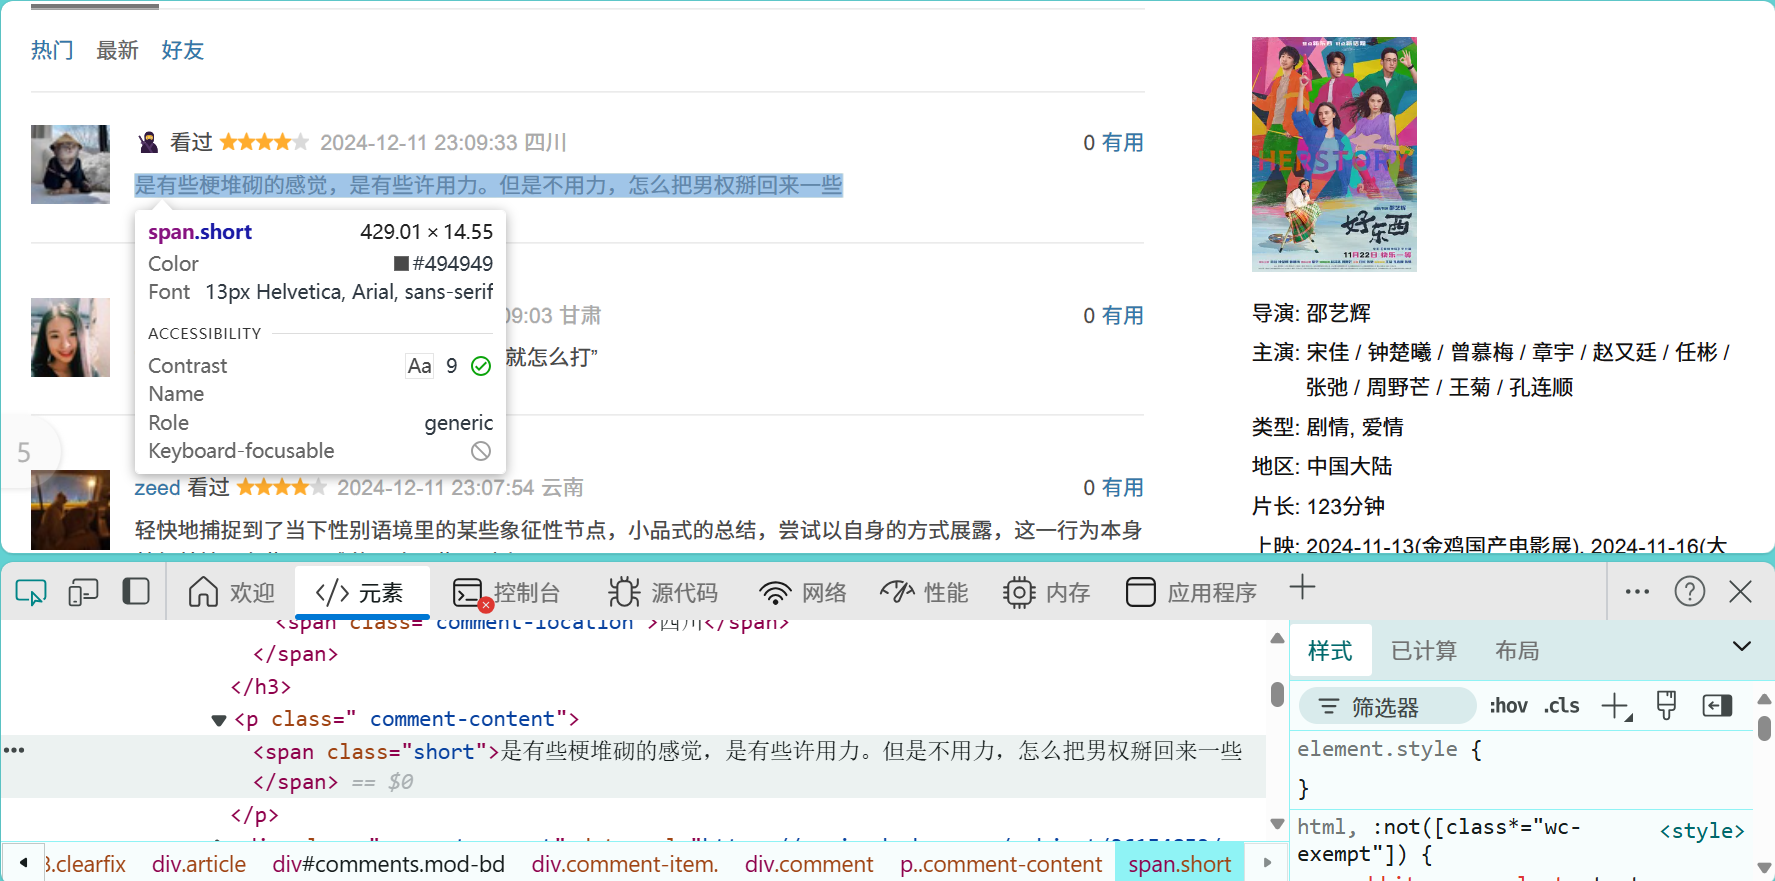

In [5]:
comments = doc('span.short')

for comment in comments.items():
    print(comment.text())


8.5 有刻意的部分，但是不影响我觉得意犹未尽。章宇好帅啊。
借茉莉之口推动一切转折，最后那个聚光灯小俗但仍旧需要这样好的声音
我喜欢 我的2024年度最佳
接近结尾含义逐渐升华。“正是因为我们足够乐观和自信，才可以直面悲剧。”钟楚曦的两次落泪也让我跟着小哭了两次，90后的原生伤痛，营销号戏谑的一句“玩乐队的十之八九有原生家庭伤痛”还真不无道理。就算夫妻彼此不喜欢了，但仍都是爱孩子的，这种道理很多父母却很难参悟。影片中的男性已经是脱离现实般理想化的存在了，特别是赵又廷这样看上野千鹤子的男的现实更是寥寥无几。小叶和铁梅不禁让我反省自己，是不是也那么缺爱，酒精加倒贴；是不是也那么爱把别人当工具人…但是又想到小叶说的：我们为什么要表现得那么好呢？谁要求我们要尽善尽美那么完美的呢？插句题外话，看的时候一直想的是原来去年看到在照明商店前拍戏的剧组就是这个电影啊，还有延庆路、摩登天空，一切是既陌生又熟悉。
我们是自己最爱的爱人💞互为工具人不带入该死的感情也挺好🙂
女人被害妄想症加霸道总裁爱上离异带娃的我幻想症综合体
单亲妈妈之那咋啦
小孩，你怎么打鼓，女孩就怎么打鼓！
最喜欢的是小孩在用耳机听一些白噪音去猜都是什么声音的那段。
我的2024年度最佳院线电影
成年人的都市童话
很轻松愉悦的两个小时，观点输出不强势，感情宛转流动 在宋佳身上get到了女同所谓的姐感 完全是妈妈级别🥰
上映第一天看的补个五星，感谢邵导构建的大女人的视角，看得爆爽。都说三个女人是最小的社会主义，我们三个女人一起去看电影，一起吐槽，一起大笑，十年友谊随着意识觉醒相约单身显得愈发珍贵。尤其是电影外某个群体的破防，更衬得性别立场优先的爽。最后，希望导演坚持本心，继续前进，把那些魍魉之徒踩在脚下
（1）21年的爱情神话，24年的好东西，邵艺辉在这个题材上的掌控力已经炉火纯青了 （2）“你不是见过很多明星了么，就上次在你旁边吃面那个，那个谁，贾樟柯” “他们算什么明星嘛” “那你就写见过四字弟弟” 这段太搞了，笑死我了
感觉就是正常的剧情，评分还挺高的。
特别好！！！
金句频出
好看，非常不错的女性电影
觉醒了，然后呢？挺有意思的讲得挺好的一个故事，对宋佳的山花滤镜太深了，有点像看张校另一个平行世界里可能的人生的感觉。
上周末电影院看的。还挺好看，我知道导演似乎想探讨哪些话题，但是，探讨了吗？有结果吗？


- **打印id名**

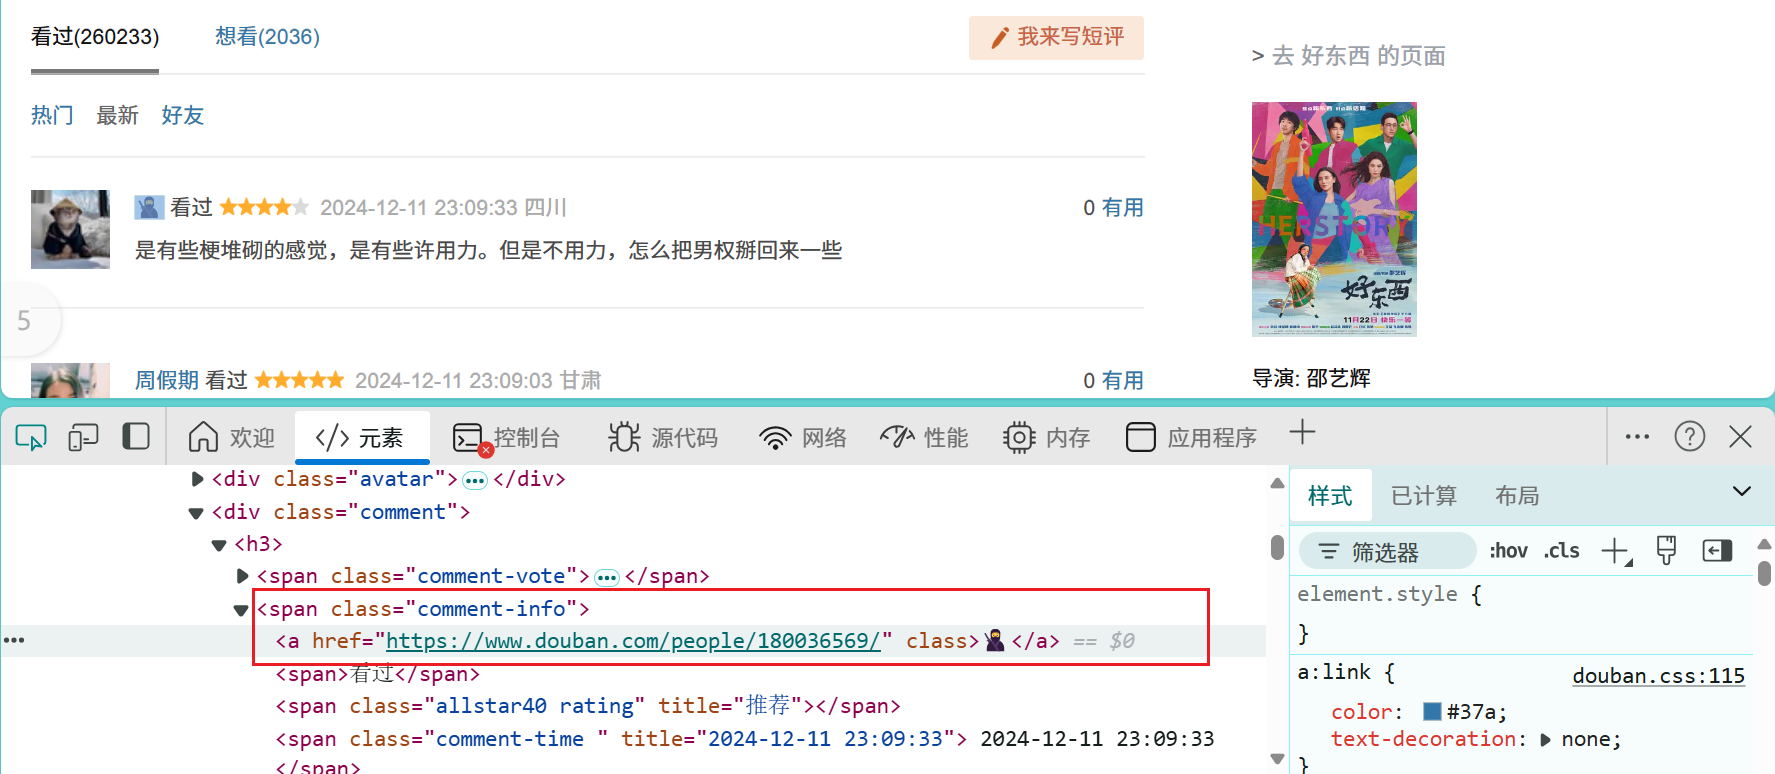

In [6]:
id_names = doc('span.comment-info a')

for id_name in id_names.items():
    print(id_name.text())

酸菜泡鱼鱼
工藤新文儿
开花沼泽地
虚妄
豆子🎀
信达雅翻译警察
And you
Lmq
我是白鲸你是海
树藤
爆炸小鱼粥
被骗47次
祈鹿
NEAF
久居她城
阴天还是雨天
今天晚上吃啥
局部多云
偷方糖的小人儿
衔枚无声


- **打印用户id链接**

In [7]:
for link in id_names.items():
    print(link.attr("href"))

https://www.douban.com/people/zhz270/
https://www.douban.com/people/141424702/
https://www.douban.com/people/183059042/
https://www.douban.com/people/205012784/
https://www.douban.com/people/209478230/
https://www.douban.com/people/keinshen/
https://www.douban.com/people/208877105/
https://www.douban.com/people/Lmq1999/
https://www.douban.com/people/78509060/
https://www.douban.com/people/141058764/
https://www.douban.com/people/yss0224/
https://www.douban.com/people/162313447/
https://www.douban.com/people/215855550/
https://www.douban.com/people/183275535/
https://www.douban.com/people/182021443/
https://www.douban.com/people/yyan0413/
https://www.douban.com/people/124881475/
https://www.douban.com/people/270597976/
https://www.douban.com/people/58439745/
https://www.douban.com/people/79646325/


- **打印用户评分**

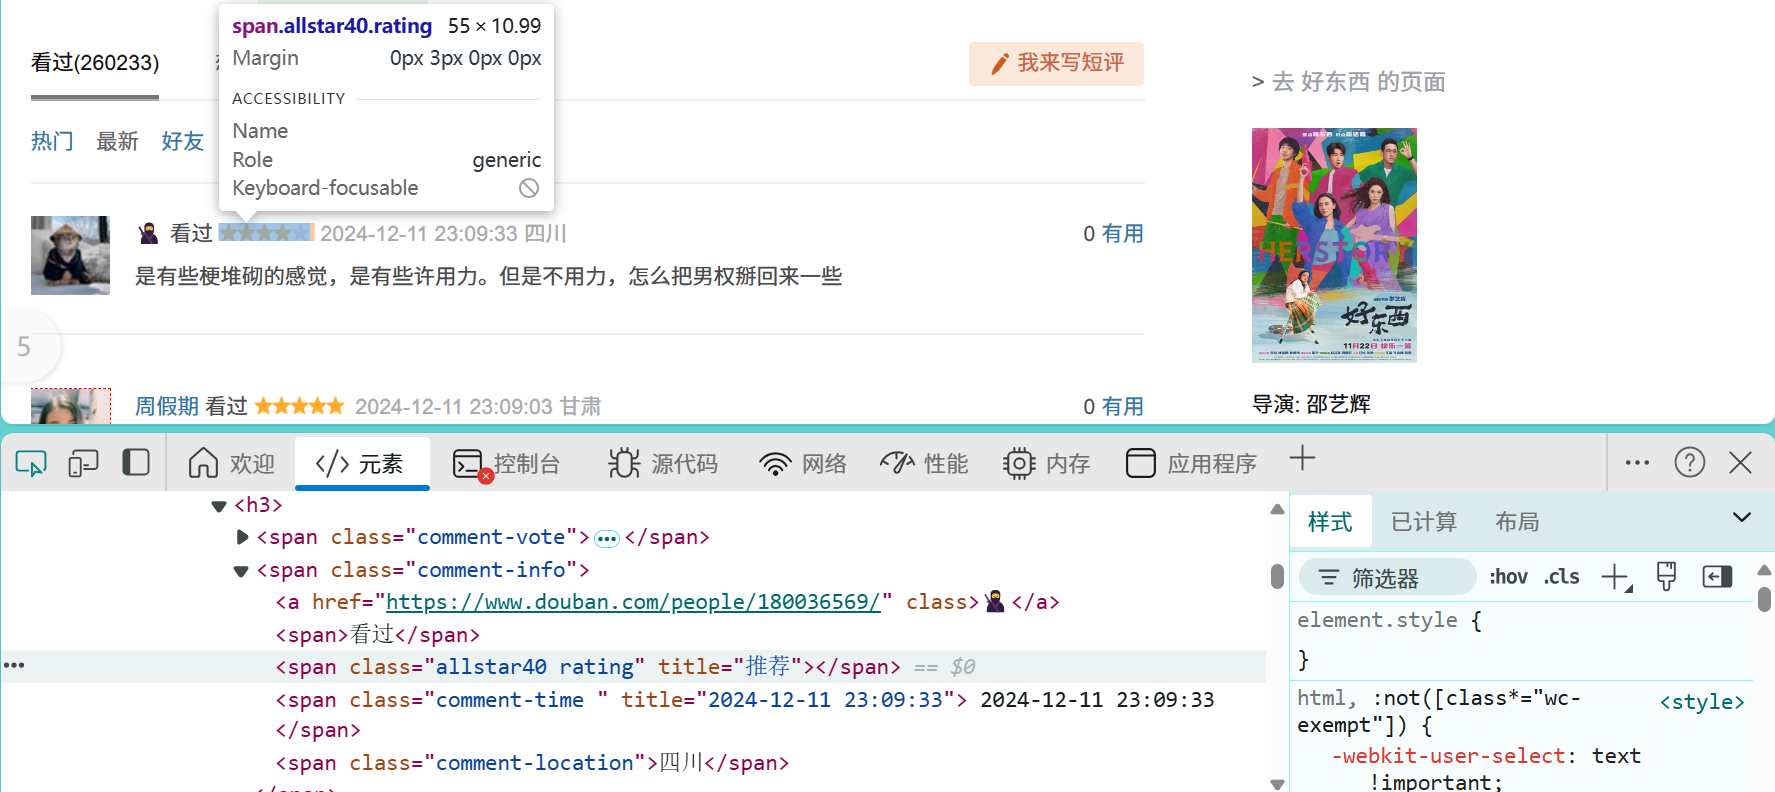

我们需要把`span`.`comment-info` 下的第二个`span`标签中的`title`属性提取出来

其实我也不是很懂怎么操作，问问chatgpt（在网页点击鼠标右键，打开【查看源代码】（快捷键：Ctrl+U），通过搜索关键字定位代码片段，复制下来）

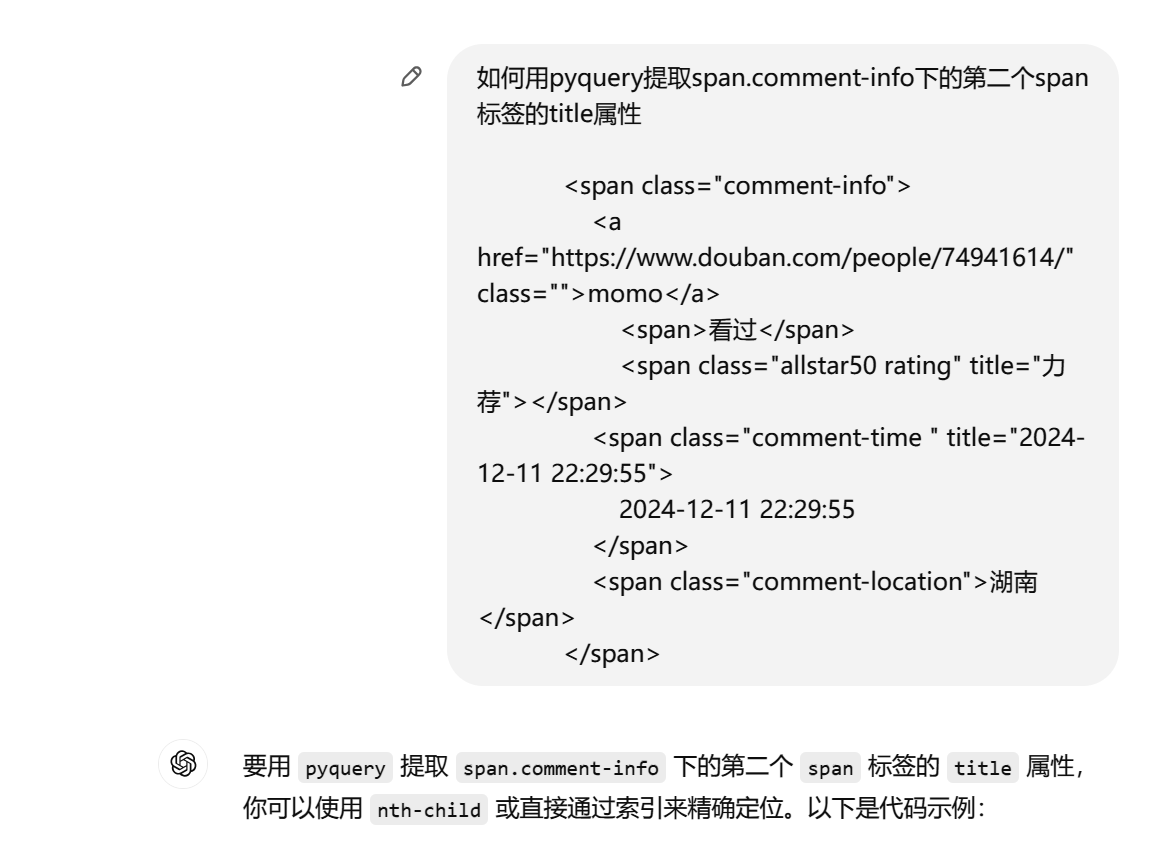

In [8]:
ratings = doc("span.comment-info span:nth-child(3)") #span.comment-info span:nth-child(3)：选择 span.comment-info 下的第三个子节点（第二个 span 标签，因为 a 标签是第一个子节点）。

for rating in ratings.items():
    print(rating.attr("title"))

力荐
推荐
力荐
推荐
力荐
很差
力荐
力荐
推荐
力荐
推荐
力荐
力荐
力荐
还行
力荐
力荐
推荐
力荐
还行


------------------------------ 

# 第四部分：提取数据（整合成一个csv文件）

整合代码，将结果保存成一个csv文件

In [9]:
from pyquery import PyQuery as pq

doc = pq(html)

comment_items = doc('div.comment-item')


comment_list =[]

for item in comment_items.items():
    comment_text = item('span.short').text()
    id_name = item('span.comment-info a').text()
    user_id_link = item('span.comment-info a').attr("href")
    rating = item("span.comment-info span:nth-child(3)").attr("title")
    
    comment_dict = {
        'id_name': id_name,
        'comment_text': comment_text,
        'user_id_link': user_id_link,
        'rating': rating
    }   
    
    
    comment_list.append(comment_dict)

In [31]:
comment_list

[{'id_name': '凤梨酥',
  'comment_text': '电影立意真的非常好，可以说是大陆地区从未有过的题材，希望未来可以看到我国有更多这样的电影，不要再催婚催育了',
  'user_id_link': 'https://www.douban.com/people/99365648/',
  'rating': '力荐'},
 {'id_name': 'Felicia',
  'comment_text': '为什么要做好，为什么不能搞砸！',
  'user_id_link': 'https://www.douban.com/people/146073848/',
  'rating': '力荐'},
 {'id_name': 'Molly',
  'comment_text': '你读过几本上野千鹤子🤣🤣🤣🤣',
  'user_id_link': 'https://www.douban.com/people/151512174/',
  'rating': '力荐'},
 {'id_name': '小鲑鱼',
  'comment_text': '谢谢好东西',
  'user_id_link': 'https://www.douban.com/people/hellokon/',
  'rating': '力荐'},
 {'id_name': 'L²',
  'comment_text': 'NANA味很浓 但不讨厌 镜头语言很棒 绍导厉害',
  'user_id_link': 'https://www.douban.com/people/129443988/',
  'rating': '力荐'},
 {'id_name': '爱玛·包法利',
  'comment_text': '《电影世界》以前评选过一个“华语电影100大奇迹时刻”。本片“猜声音”那一段完全是top5的存在。',
  'user_id_link': 'https://www.douban.com/people/1935938/',
  'rating': '推荐'},
 {'id_name': '电子星',
  'comment_text': '说实话我是被导演要讲的，要表达的人与人之间的关爱所感动。有些娱乐元素还是令人起鸡皮疙瘩，我最近最喜欢的电影！加油！继续

In [10]:
import csv

# 打开文件
file = open("herstory.csv", 'a+', encoding='utf-8', newline='')     
fieldnames = ['id_name', 'comment_text', 'user_id_link', 'rating']  
writer = csv.DictWriter(file, fieldnames=fieldnames)    
writer.writeheader() 

for comment in comment_list:
    writer.writerow(comment)

file.close()

------------------------------ 

# 抓取前4页

使用`random`和`time`模块，随机生成一个时间间隔，然后等待这个时间间隔，再抓取豆瓣电影最新短评。

In [11]:
import requests
from pyquery import PyQuery as pq
import csv
import time
import random

In [12]:
url_list = []
url_template = "https://movie.douban.com/subject/36154853/comments?start={page}&limit=20&status=P&sort=time"


for p in range(1, 5):
    url = url_template.format(page=p*20)
    url_list.append(url)
    
url_list
    

['https://movie.douban.com/subject/36154853/comments?start=20&limit=20&status=P&sort=time',
 'https://movie.douban.com/subject/36154853/comments?start=40&limit=20&status=P&sort=time',
 'https://movie.douban.com/subject/36154853/comments?start=60&limit=20&status=P&sort=time',
 'https://movie.douban.com/subject/36154853/comments?start=80&limit=20&status=P&sort=time']

In [18]:
def get_html(url):

    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
                AppleWebKit/537.36 (KHTML, like Gecko) \
               Chrome/119.0.0.0 Safari/537.36 Edg/119.0.0.0',
               'cookie':cookie_string #如果是通过开发者工具获取cookie则直接改变这里
               }

    # 发送带 Cookie 的请求
    response = requests.get(url, headers=headers)
    html = response.text
    return html

In [19]:
def extract_comment_list(html):

    doc = pq(html)

    comment_items = doc('div.comment-item')


    comment_list =[]

    for item in comment_items.items():
        comment_text = item('span.short').text()
        id_name = item('span.comment-info a').text()
        user_id_link = item('span.comment-info a').attr("href")
        rating = item("span.comment-info span:nth-child(3)").attr("title")
    
        comment_dict = {
            'id_name': id_name,
            'comment_text': comment_text,
            'user_id_link': user_id_link,
            'rating': rating
        }   
    
    
        comment_list.append(comment_dict)
        
    return comment_list

In [20]:
# 打开文件
file = open("herstory_4pages.csv", 'a+', encoding='utf-8', newline='')     
fieldnames = ['id_name', 'comment_text', 'user_id_link', 'rating']  
writer = csv.DictWriter(file, fieldnames=fieldnames)    
writer.writeheader() 

for url in url_list:
    
    print(f"正在抓取：{url}")
    html = get_html(url)
    
    wait_time = random.randint(3, 5) # 生成 3 到 5 秒的随机浮点数
    print(f"等待{wait_time}秒")
    
    time.sleep(wait_time)   # 暂停指定的秒数
    
    comment_list = extract_comment_list(html)
    for comment in comment_list:
        writer.writerow(comment)


print("抓取完成")
    
file.close()

正在抓取：https://movie.douban.com/subject/36154853/comments?start=20&limit=20&status=P&sort=time
等待5秒
正在抓取：https://movie.douban.com/subject/36154853/comments?start=40&limit=20&status=P&sort=time
等待3秒
正在抓取：https://movie.douban.com/subject/36154853/comments?start=60&limit=20&status=P&sort=time
等待5秒
正在抓取：https://movie.douban.com/subject/36154853/comments?start=80&limit=20&status=P&sort=time
等待5秒
抓取完成
